In [37]:
import numpy as np
import matplotlib.pyplot as plt

delta_x = 0.01
rho_max  = 1

x_range = 1
t_range = 0.5

delta_t = delta_x/abs((1-2*rho_max))

def relative(x):
    return x + 0.5

rho = np.zeros(int(x_range/delta_x*t_range/delta_t)).reshape(int(x_range/delta_x), int(t_range/delta_t))
for i in range(int(relative(-0.5)/delta_x), int(relative(0)/delta_x)):
    rho[i][0] = 1
for i in range(int(relative(0)/delta_x), int(relative(0.5)/delta_x)):
    rho[i][0] = 0.5



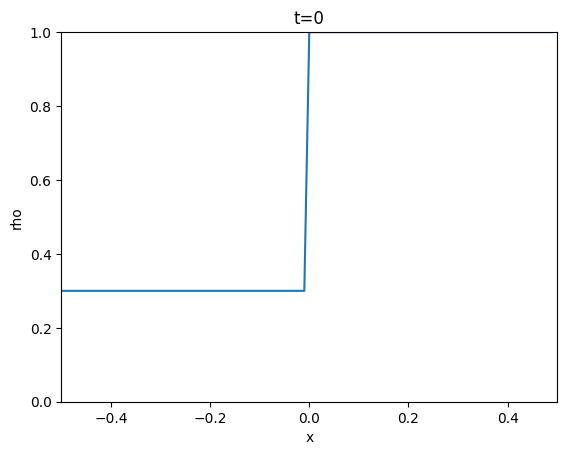

In [31]:
# draw rho at t=0
plt.title("t=0")
plt.xlabel("x")
plt.ylabel("rho")
plt.xlim(-0.5, 0.5)
plt.ylim(0, 1)
plt.plot(np.arange(-0.5, 0.5, delta_x), rho[:, 0], label="t=0")
plt.show()

In [32]:
def f(rho):
    return rho * (1 - rho)


In [33]:
def a(x, y):
    if (x - y) < 1e-6 :
        return 0
    else:
        return (f(x) - f(y))/(x-y)

In [38]:
# FVM with upwind
for n in range(0, int(t_range/delta_t)-1):
    for j in range(1, int(x_range/delta_x)-1):
        if a(rho[j+1][n], rho[j][n]) > 0:
            rho[j][n+1] = rho[j][n] - delta_t/delta_x * (f(rho[j][n]) - f(rho[j-1][n]))
        else:
            rho[j][n+1] = rho[j][n] - delta_t/delta_x * (f(rho[j+1][n]) - f(rho[j][n]))


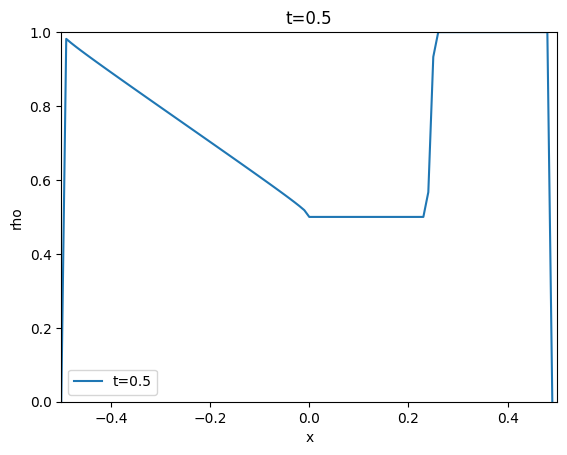

In [39]:
# draw rho at t=0.5
plt.title("t=0.5")
plt.xlabel("x")
plt.ylabel("rho")
plt.xlim(-0.5, 0.5)
plt.ylim(0, 1)
plt.plot(np.arange(-0.5, 0.5, delta_x), rho[:, int(t_range/delta_t)-1], label="t=0.5")
plt.legend()
plt.show()

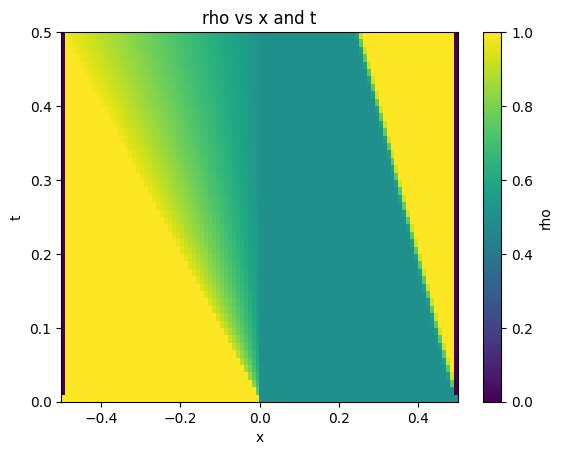

In [40]:
# plot rho vs x and t
plt.title("rho vs x and t")
plt.xlabel("x")
plt.ylabel("t")
plt.xlim(-0.5, 0.5)
plt.ylim(0, t_range)
plt.imshow(rho.T, extent=(-0.5, 0.5, 0, t_range), aspect='auto', origin='lower')
plt.colorbar(label='rho')
# plt.savefig("rho_vs_x_and_t.png")
plt.show()
